### Database initialisation verification

In [12]:
from sqlalchemy import inspect, create_engine, text

# Connexion à la base
engine = create_engine("sqlite:///./census.db")
inspector = inspect(engine)

# Liste des tables
tables = inspector.get_table_names()
print("✅ Tables disponibles :", tables)

# Si la table "users" existe
if "users" in tables:
    # Colonnes
    columns = [col["name"] for col in inspector.get_columns("users")]
    print("🧱 Colonnes de 'users' :", columns)

    # Affichage des 5 premières lignes
    with engine.connect() as conn:
        result = conn.execute(text("SELECT * FROM users LIMIT 5"))
        rows = result.mappings().all()  # ✅ renvoie des dict-like
        print("\n📊 Extrait des données (5 premières lignes) :")
        for row in rows:
            print(dict(row))
else:
    print("❌ La table 'users' n'existe pas.")

✅ Tables disponibles : ['alembic_version', 'users']
🧱 Colonnes de 'users' : ['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

📊 Extrait des données (5 premières lignes) :
{'id': 1, 'age': 39, 'workclass': 'State-gov', 'fnlwgt': 77516, 'education': 'Bachelors', 'education_num': 13, 'marital_status': 'Never-married', 'occupation': 'Adm-clerical', 'relationship': 'Not-in-family', 'capital_gain': 2174, 'capital_loss': 0, 'hours_per_week': 40, 'native_country': 'United-States', 'income': '<=50K'}
{'id': 2, 'age': 50, 'workclass': 'Self-emp-not-inc', 'fnlwgt': 83311, 'education': 'Bachelors', 'education_num': 13, 'marital_status': 'Married-civ-spouse', 'occupation': 'Exec-managerial', 'relationship': 'Husband', 'capital_gain': 0, 'capital_loss': 0, 'hours_per_week': 13, 'native_country': 'United-States', 'income': '<=50K'}
{'id': 3, 'age': 38, 'workc

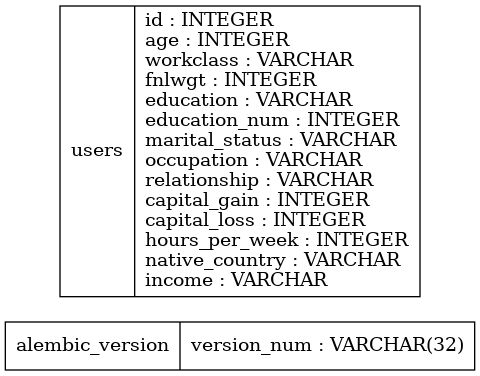

In [13]:
from sqlalchemy import create_engine, MetaData
from graphviz import Digraph
from IPython.display import Image, display
import os

# Connexion à la base
engine = create_engine("sqlite:///./census.db")
metadata = MetaData()
metadata.reflect(bind=engine)

# Création du graphe
dot = Digraph(comment="ER Diagram", format='png')
dot.attr(rankdir='LR', fontsize='10')

# Créer un noeud pour chaque table
for table_name, table in metadata.tables.items():
    fields = [f"{col.name} : {col.type}" for col in table.columns]
    fields_str = "\\l".join(fields) + "\\l"
    label = f"{{{table_name}|{fields_str}}}"
    dot.node(table_name, shape="record", label=label)

# Rendu
output_path = "/tmp/census_schema"
dot.render(output_path, format="png", cleanup=True)

# Affichage dans le notebook
if os.path.exists(output_path + ".png"):
    display(Image(filename=output_path + ".png"))
else:
    print("❌ L'image n'a pas pu être générée.")